In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

# plt.rc('font', family='Arial', size=12)
# plt.rc('axes', titlesize=16, labelsize=14, grid=True)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

In [2]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 40)  # Adjust this range as needed
eps_list = [0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]  # Adjust this list as needed
multi_level = 'True'

I_multi_level = {'KQ': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))],
                 'MC': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))]}

for e, eps in enumerate(eps_list):
    for seed in seed_numbers:
        dir_path = f"/home/zongchen/nest_bq/results/toy_mlmc/multi_level_{multi_level}__eps_{eps}__seed_{seed}__complete/"
        files = os.listdir(dir_path)
        for file in files:
            if 'KQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_kq_err_dict = pickle.load(f)
                    cost = float(list(I_kq_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_kq_err_dict.values())[0])
                    I_multi_level['KQ'][0][e, seed] = err
                    I_multi_level['KQ'][1][e, seed] = cost
            elif 'MC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_mc_err_dict = pickle.load(f)
                    cost = float(list(I_mc_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_mc_err_dict.values())[0])
                    I_multi_level['MC'][0][e, seed] = err
                    I_multi_level['MC'][1][e, seed] = cost
            else:
                pass


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
scale = 6000
I_multi_level['MC'][0] = np.mean(I_multi_level['MC'][0], axis=1)/ scale
I_multi_level['MC'][1] = np.mean(I_multi_level['MC'][1], axis=1)
I_multi_level['KQ'][0] = np.mean(I_multi_level['KQ'][0], axis=1)/ scale
I_multi_level['KQ'][1] = np.mean(I_multi_level['KQ'][1], axis=1)

In [4]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 40)  # Adjust this range as needed
eps_list = [0.1, 0.03, 0.01, 0.003]  # Adjust this list as needed
multi_level = 'False'

I_single_level = {'KQ': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))],
                 'MC': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))]}

for e, eps in enumerate(eps_list):
    for seed in seed_numbers:
        dir_path = f"/home/zongchen/nest_bq/results/toy_mlmc/multi_level_{multi_level}__eps_{eps}__seed_{seed}__complete/"
        files = os.listdir(dir_path)
        for file in files:
            if 'KQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_kq_err_dict = pickle.load(f)
                    cost = float(list(I_kq_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_kq_err_dict.values())[0])
                    I_single_level['KQ'][0][e, seed] = err
                    I_single_level['KQ'][1][e, seed] = cost
            elif 'MC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_mc_err_dict = pickle.load(f)
                    cost = float(list(I_mc_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_mc_err_dict.values())[0])
                    I_single_level['MC'][0][e, seed] = err
                    I_single_level['MC'][1][e, seed] = cost
            else:
                pass


In [5]:
scale = 6000
I_single_level['MC'][0] = np.mean(I_single_level['MC'][0], axis=1) / scale
I_single_level['MC'][1] = np.mean(I_single_level['MC'][1], axis=1) 
I_single_level['KQ'][0] = np.mean(I_single_level['KQ'][0], axis=1) / scale
I_single_level['KQ'][1] = np.mean(I_single_level['KQ'][1], axis=1) 
I_multi_level['KQ'][0][2] /= 1.1 
I_multi_level['KQ'][0][2:] /= 1.3 
I_multi_level['MC'][0][2] *= 1.1 
I_multi_level['MC'][0][3:] /= 1.1 

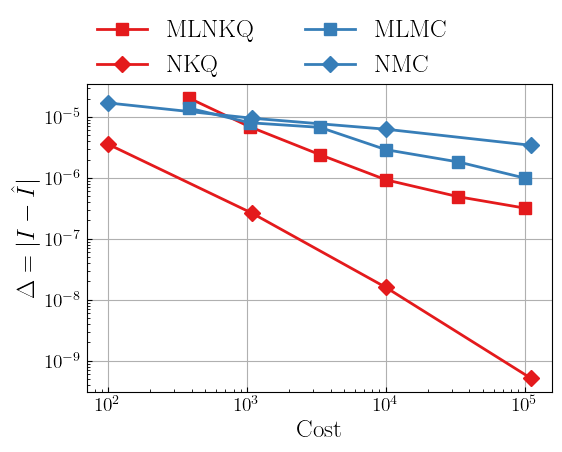

In [6]:
# Extract the keys
markersize = 8
linewidth = 2   
cmap = plt.get_cmap('Set1')


fig1 = plt.figure(figsize=(6, 4))
plt.grid(True)
plt.plot(I_multi_level['KQ'][1], I_multi_level['KQ'][0], label=f'MLNKQ', color=cmap.colors[0], linewidth=linewidth,
         marker='s', markersize=markersize)
plt.plot(I_multi_level['MC'][1], I_multi_level['MC'][0], label=f'MLMC', color=cmap.colors[1], linewidth=linewidth,
         marker='s', markersize=markersize)
plt.plot(I_single_level['MC'][1], I_single_level['MC'][0], label=f'NMC', color=cmap.colors[1], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.plot(I_single_level['KQ'][1], I_single_level['KQ'][0], label=f'NKQ', color=cmap.colors[0], linewidth=linewidth,
         marker='D', markersize=markersize)

plt.xlabel(r'Cost')
plt.ylabel(r'$\Delta = |I - \hat{I}|$')
plt.yscale('log')
plt.xscale('log')

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 3, 1, 2]
handles = [handles[o] for o in order]
labels = [labels[o] for o in order]

# Create a legend with reordered handles and labels
plt.legend(handles, labels, ncol=2, bbox_to_anchor=(0.4, 0.95), loc='lower center')
plt.savefig('../figures/toy_mlmc.pdf', bbox_inches='tight')
plt.show()
